# Tasks for laboratory assignment 3

In [1]:
import pandas as pd


def extract_texts_from_file(file_path: str) -> pd.DataFrame:
    data = pd.read_csv(file_path, low_memory=False, sep=",", encoding="cp1251")
    return data

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0    

In [2]:
import matplotlib.pyplot as plt


def plot_regression_data(x_train, y_train, x_test, y_test, y_pred, xlabel, ylabel) -> None:
    plt.scatter(x_train, y_train, color="black", label='Train data')
    plt.scatter(x_test, y_test, color="orange", label='Test data')

    plt.plot(x_test, y_pred, color="blue", linewidth=3, label='Regression Line')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

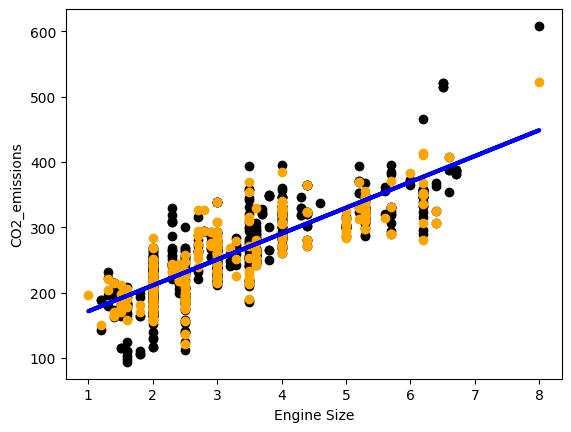

R2: 0.6590481294523395
MSE: 1202.5493766221455


[39.5658414488647]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression


def CO2_emissions(df: pd.DataFrame) -> list[float]:
    x, y = (df[["Engine_Size"]], df["CO2_Emissions"])

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    plot_regression_data(x_train, y_train, x_test, y_test, y_pred, "Engine Size", "CO2_emissions")

    print(f"R2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")

    return model.coef_.tolist()

data = extract_texts_from_file("resources/CO2_emission.csv")
CO2_emissions(data)

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

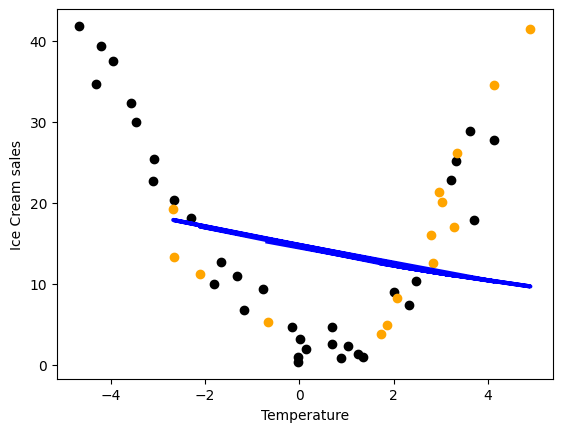

R2: -0.45471232926100824
MSE: 158.2483758293253


[-0.081306812678673]

In [4]:
from sklearn.linear_model import GammaRegressor


def ice_cream_selling(df: pd.DataFrame) -> list[float]:
    x, y = (df[[df.columns[0]]], df[df.columns[1]])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

    model = GammaRegressor()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    plot_regression_data(x_train, y_train, x_test, y_test, y_pred, "Temperature", "Ice Cream sales")

    print(f"R2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")

    return model.coef_.tolist()

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

In [5]:
def power_consumption(df: pd.DataFrame) -> list[float]:
    x = df[["Temperature", "Humidity", "WindSpeed"]]
    y = df[["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"R2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")

    return model.coef_.tolist()

data = extract_texts_from_file('resources/powerconsumption.csv')
power_consumption(data)

R2: 0.19841974069406312
MSE: 32545410.57892966


[[505.776432392054, -49.323655498693924, -133.6854324285425],
 [292.67365024310345, -50.80887414443441, -70.64210895509069],
 [516.1835338645313, -8.544128930075928, 157.2869917036601]]

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

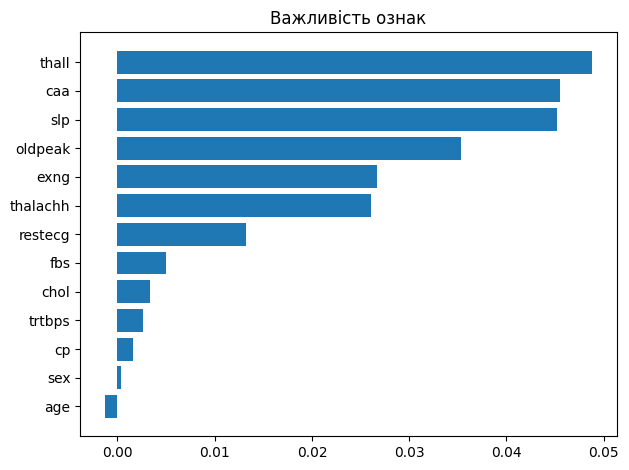

Accuracy: 0.7912087912087912
Recall: 0.875


array([[ 0.28954505,  0.02778194, -1.16079302, -0.69565161,  0.21149728,
        -0.82014004, -0.81542511]])

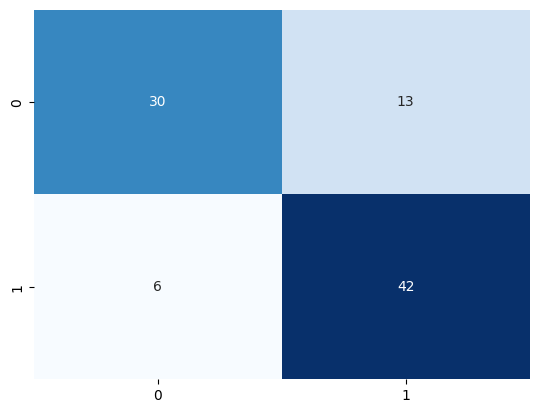

In [6]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from warnings import filterwarnings
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression


filterwarnings('ignore')

def heart_classification(df: pd.DataFrame) -> list[float]:
    x, y = (df.drop(columns=["output"]), df["output"])

    # Searching the best params, deleting unnecessary and high-correlated
    corr_matrix = x.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    x.drop(columns=to_drop, inplace=True)

    model = LogisticRegression()
    model.fit(x, y)

    result = permutation_importance(model, x, y, n_repeats=10, n_jobs=3)
    sorted_idx = result.importances_mean.argsort()
    fi_dict = dict(zip(x.columns, result.importances[sorted_idx].mean(axis=1).T))

    fig, ax = plt.subplots()
    ax.barh(fi_dict.keys(), fi_dict.values())
    ax.set_title("Важливість ознак")
    fig.tight_layout()
    plt.show()

    to_drop = [column for column, value in fi_dict.items() if value <= 0.01]
    x.drop(columns=to_drop, inplace=True)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

    model = LogisticRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    
    return model.coef_

data = extract_texts_from_file('resources/heart.csv')
heart_classification(data)